In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("src/")
from src.db_handler import DB_handler
from src.constants import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = DB_handler("data/db6june.feather")
db.self_check()
data = db.valid()

aspect_ratio: found 488 with NaN
elongation_shear: found 600 with NaN
triangularity_shear: found 600 with NaN
shafranov_shift: found 15060 with NaN
q_sa: found 3 outside threshold
q_sa_shear: found 83033 outside threshold
beta_e: found 428 with NaN
collision_frequency: found 1386 with NaN
collision_frequency: found 4848 outside threshold
T_ratio: found 490 outside threshold
T_ratio: found 528 with wrong sign
nD_ne_ratio: found 4574 with wrong sign
nB_ne_ratio: found 114 outside threshold
Z_eff: found 600 with NaN
Z_eff: found 348 outside threshold
te_scale: found 600 with NaN
te_scale: found 24034 outside threshold
te_scale: found 46243 with wrong sign
ti_scale: found 600 with NaN
ti_scale: found 21577 outside threshold
ti_scale: found 51749 with wrong sign
ne_scale: found 600 with NaN
ne_scale: found 145 outside threshold
nD_scale: found 600 with NaN
nD_scale: found 234 outside threshold
nB_scale: found 600 with NaN
nB_scale: found 234 outside threshold
pressure_gradient: found 600 wi

In [3]:
fields = MODEL_INPUTS
fields.append(CHI_ELECTRON)
fields.append(CHI_ION)

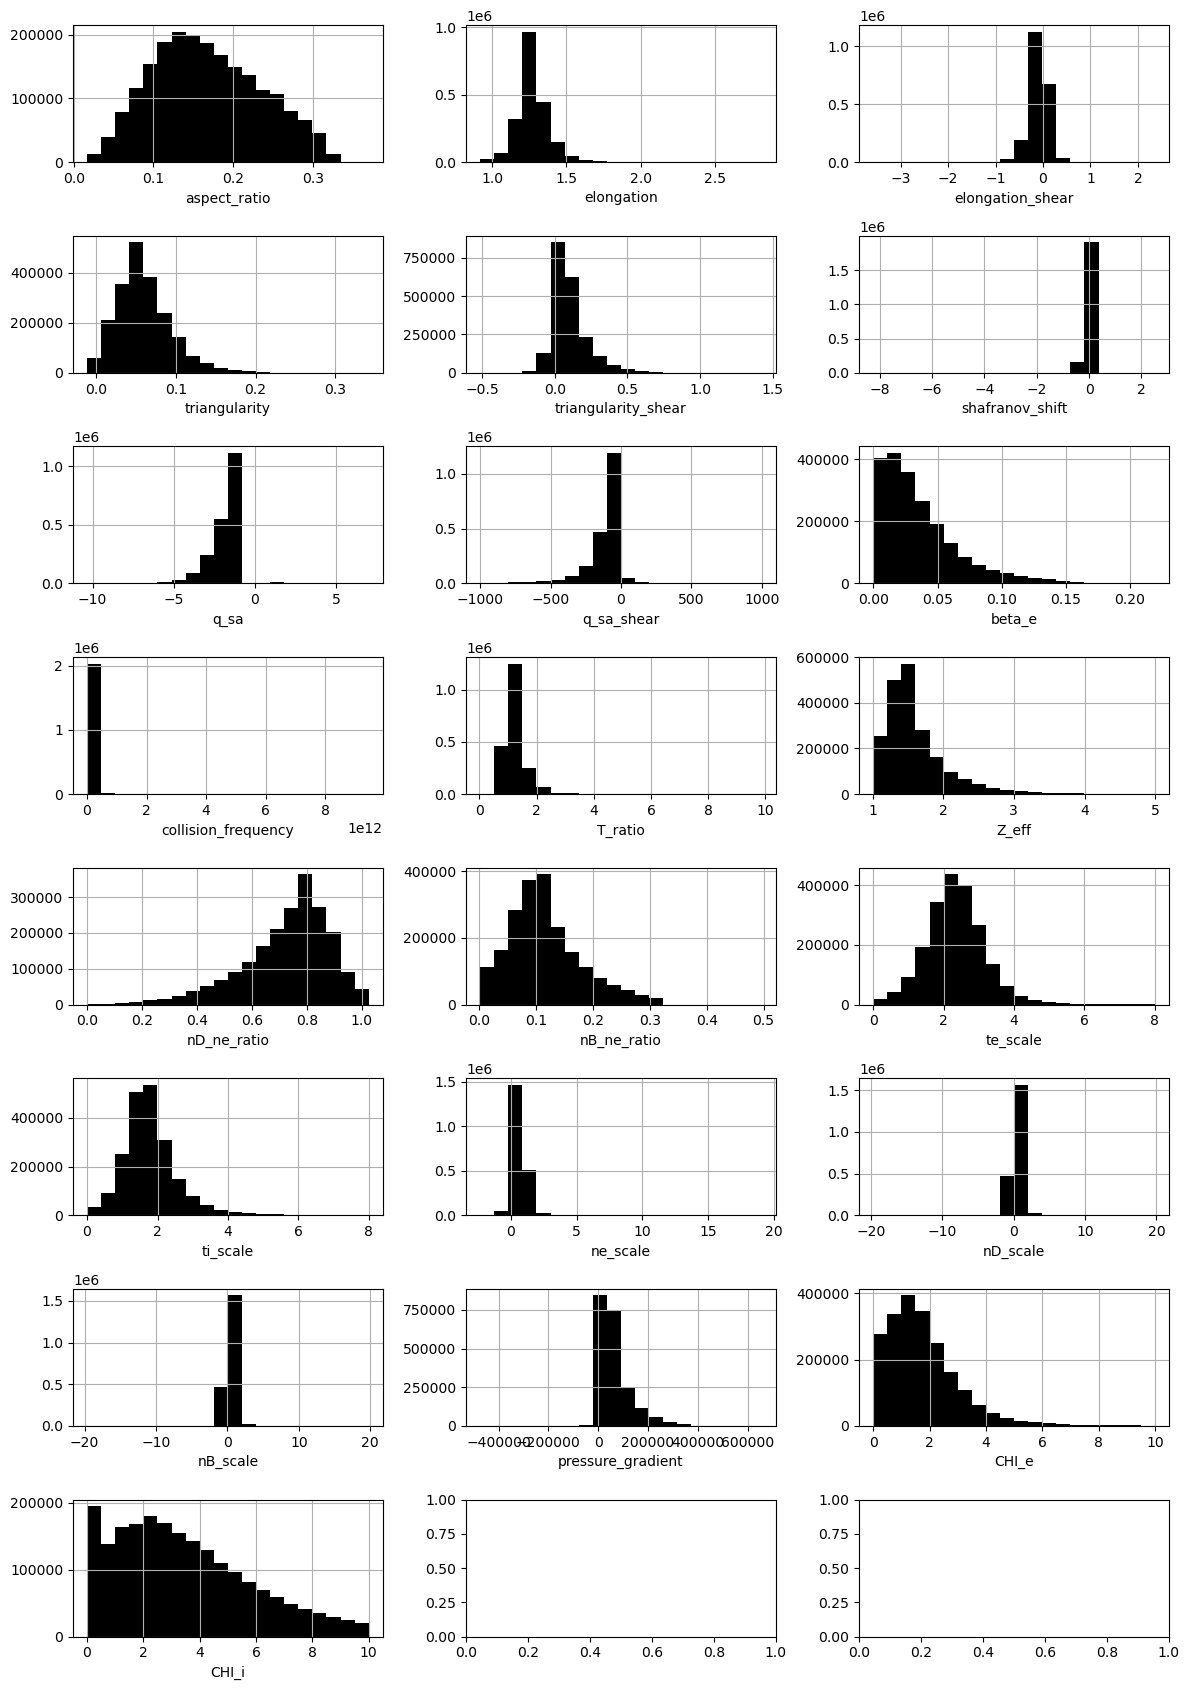

In [4]:
fig, axes = plt.subplots(8,3, figsize=(12, 17))

for i, field in enumerate(fields):
    x = i % 3
    y = i // 3
    data[field].hist(ax = axes[y][x], bins=20, color="black")
    axes[y][x].set_xlabel(field)

plt.tight_layout()

plt.savefig("../Thesis/Chapters/Appendix/img/histograms.png")

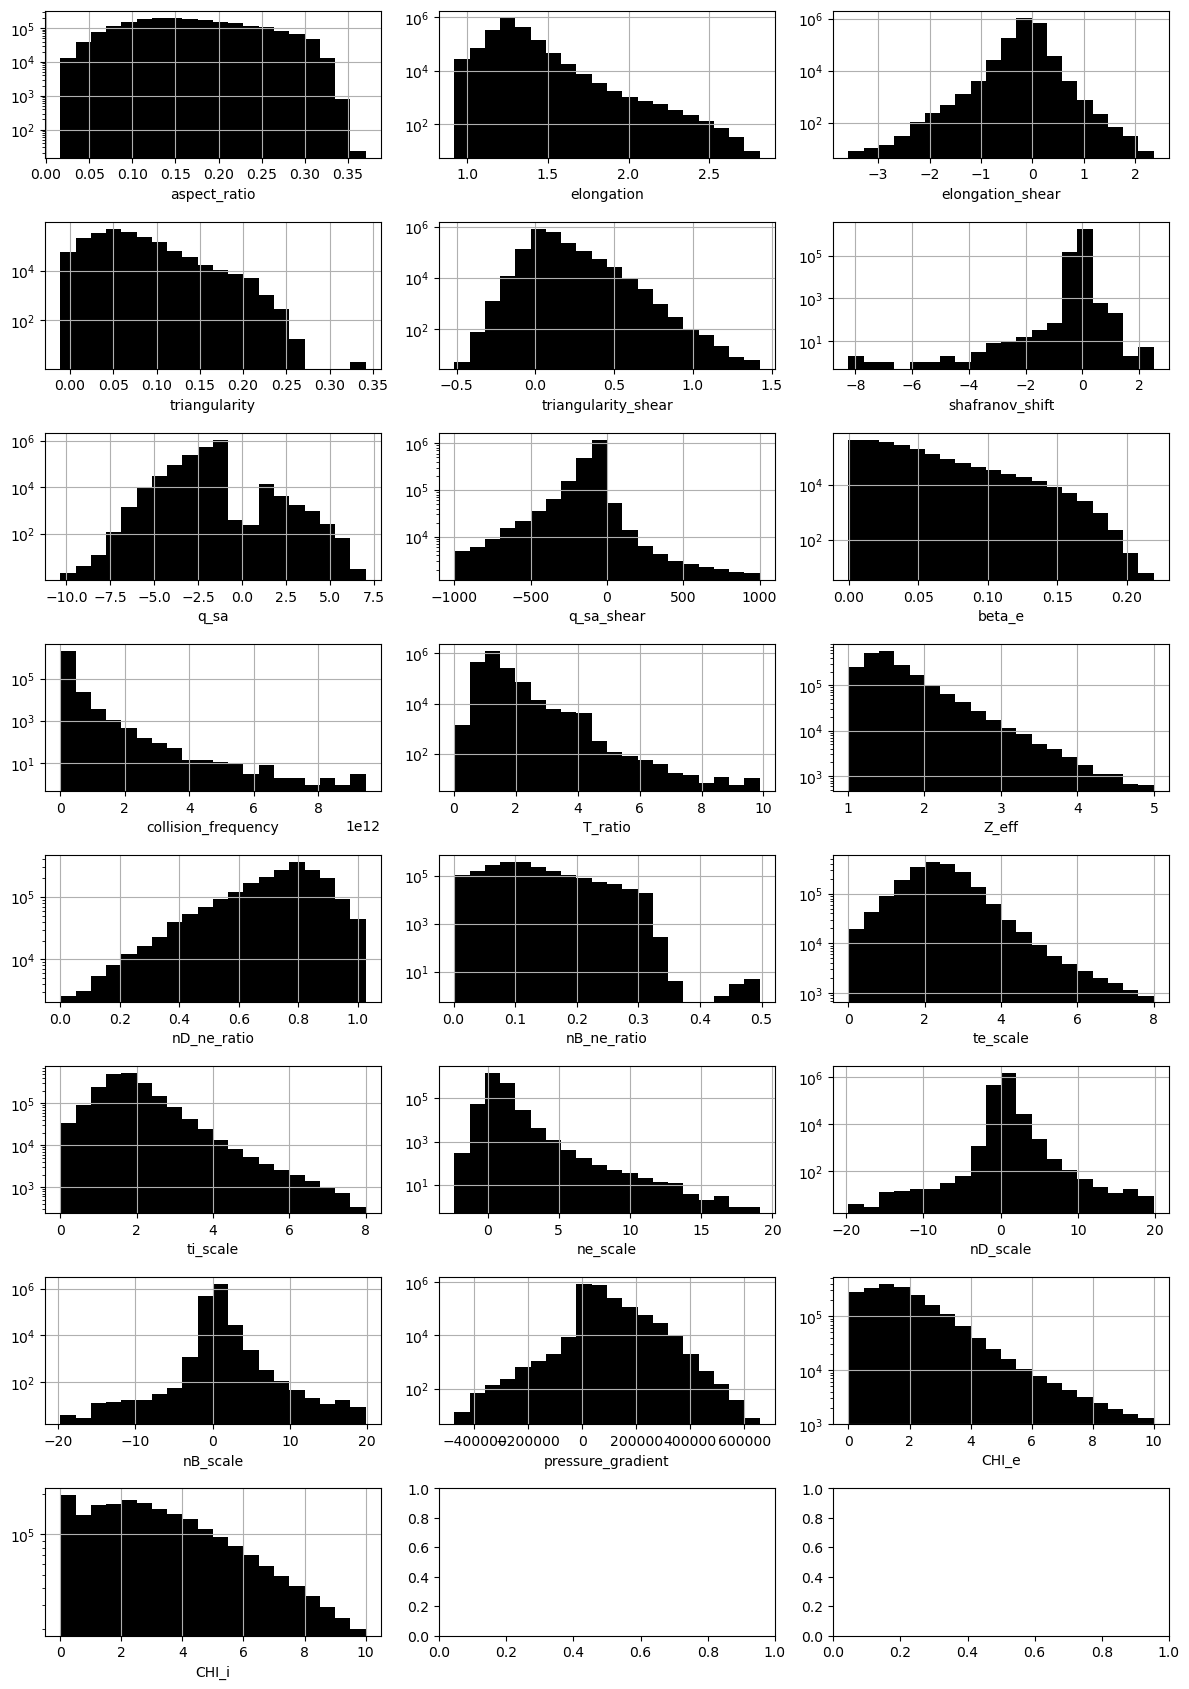

In [5]:
fig, axes = plt.subplots(8,3, figsize=(12, 17))

for i, field in enumerate(fields):
    x = i % 3
    y = i // 3
    data[field].hist(ax = axes[y][x], bins=20, log=True, color="black")
    axes[y][x].set_xlabel(field)

plt.tight_layout()

plt.savefig("../Thesis/Chapters/Appendix/img/histograms_log.png")

In [13]:
db_old = DB_handler("data/db15may.feather")
data_old = db_old.valid()

In [4]:
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import ScalarFormatter, NullFormatter

/tmp/ipykernel_74764/3283706068.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.tight_layout()


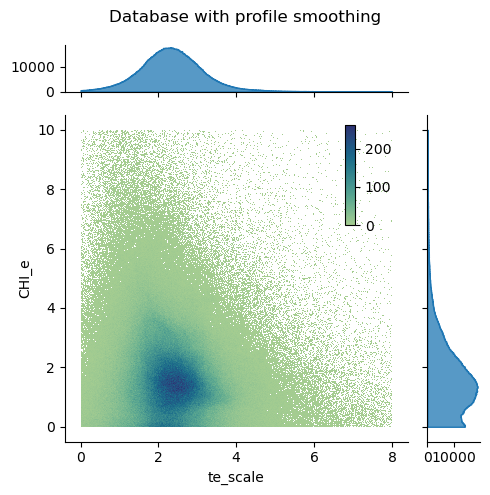

In [5]:

g = sns.JointGrid(data=data, x=TE_SCALE, y=CHI_ELECTRON, marginal_ticks=True, height=5)
cax = g.figure.add_axes([.7, .55, .02, .2])


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
g.ax_marg_x.yaxis.set_major_formatter(formatter)
g.ax_marg_y.xaxis.set_major_formatter(formatter)

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, cbar=True, cbar_ax=cax, bins=(400,400), cmap = "crest"
)
g.plot_marginals(sns.histplot, color="tab:blue", element="step",)
g.fig.suptitle("Database with profile smoothing")
g.fig.tight_layout()
g.savefig("../Thesis/Chapters/4-Implementation/img/distribution_with_smoothing.png")

/tmp/ipykernel_94814/2588416065.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.tight_layout(rect=[0, 0, 1, 1])


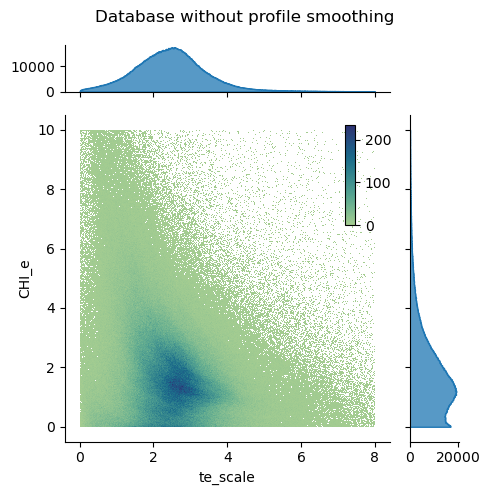

In [91]:
g = sns.JointGrid(data=data_old, x=TE_SCALE, y=CHI_ELECTRON, marginal_ticks=True, height=5)
cax = g.figure.add_axes([.7, .55, .02, .2])


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
g.ax_marg_x.yaxis.set_major_formatter(formatter)
g.ax_marg_y.xaxis.set_major_formatter(formatter)

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, cbar=True, cbar_ax=cax, bins=(400,400), cmap = "crest"
)
g.plot_marginals(sns.histplot, color="tab:blue", element="step",)
g.fig.suptitle("Database without profile smoothing")
g.fig.tight_layout()
g.savefig("../Thesis/Chapters/4-Implementation/img/distribution_without_smoothing.png")

<Axes: >

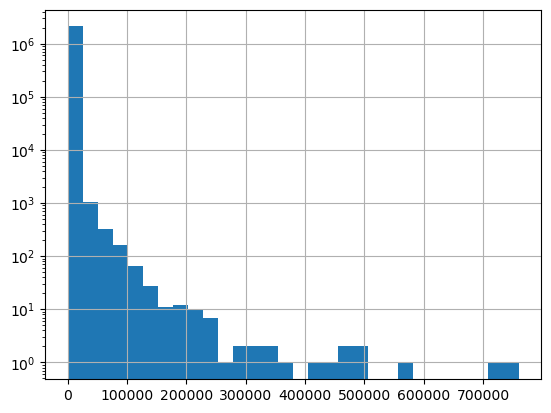

In [93]:
data[Q_SAFETY_SHEAR].abs().hist(bins=30, log=True)

/usr/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='q_sa_shear', ylabel='Count'>

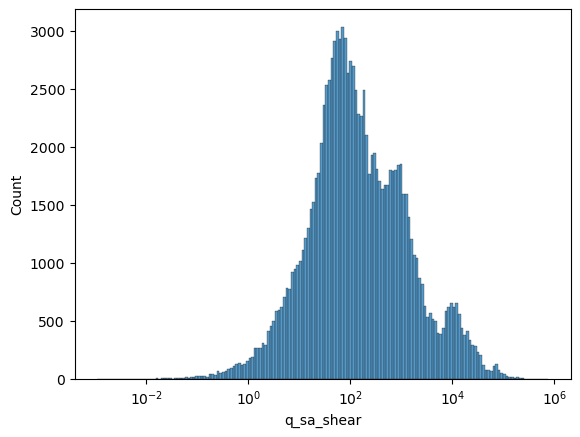

In [94]:
sns.histplot(data, x=Q_SAFETY_SHEAR, log_scale=True)

/tmp/ipykernel_74764/266307676.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.tight_layout()


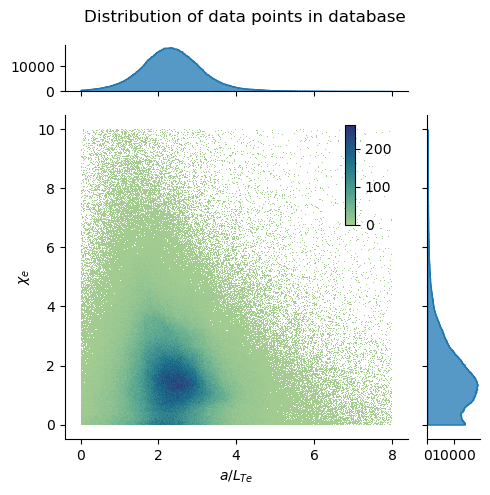

In [10]:
g = sns.JointGrid(data=data, x=TE_SCALE, y=CHI_ELECTRON, marginal_ticks=True, height=5)
cax = g.figure.add_axes([.7, .55, .02, .2])


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
g.ax_marg_x.yaxis.set_major_formatter(formatter)
g.ax_marg_y.xaxis.set_major_formatter(formatter)
g.ax_joint.set_ylabel(r"$\chi_e$")
g.ax_joint.set_xlabel(r"$a/L_{Te}$")

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, cbar=True, cbar_ax=cax, bins=(400,400), cmap = "crest"
)
g.plot_marginals(sns.histplot, color="tab:blue", element="step",)
g.fig.suptitle("Distribution of data points in database")
g.fig.tight_layout()
g.savefig("../Thesis/Chapters/5-Results/img/electron_chi_histogram.png")

/tmp/ipykernel_74764/1536294429.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  g.fig.tight_layout()


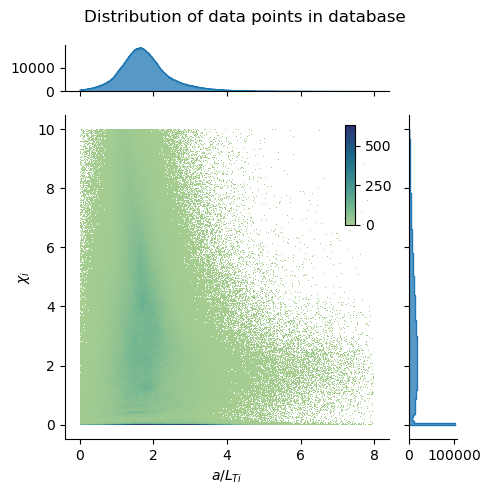

In [12]:
g = sns.JointGrid(data=data, x=TI_SCALE, y=CHI_ION, marginal_ticks=True, height=5)
cax = g.figure.add_axes([.7, .55, .02, .2])


formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
g.ax_marg_x.yaxis.set_major_formatter(formatter)
g.ax_marg_y.xaxis.set_major_formatter(formatter)
g.ax_joint.set_ylabel(r"$\chi_i$")
g.ax_joint.set_xlabel(r"$a/L_{Ti}$")

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, cbar=True, cbar_ax=cax, bins=(400,400), cmap = "crest"
)
g.plot_marginals(sns.histplot, color="tab:blue", element="step",)
g.fig.suptitle("Distribution of data points in database")
g.fig.tight_layout()
g.savefig("../Thesis/Chapters/5-Results/img/ion_chi_histogram.png")

In [12]:
data_small_chi_i = data[data[CHI_ION] < 0.1]

(array([7.25220712e-02, 7.18647714e-02, 7.67945195e-02, 8.91736645e-02,
        9.47607123e-02, 9.99095603e-02, 1.16999353e-01, 1.14479704e-01,
        1.44496393e-01, 1.59723836e-01, 1.78566429e-01, 1.95218022e-01,
        2.08473567e-01, 2.28740309e-01, 2.37832955e-01, 2.68178293e-01,
        2.87678186e-01, 3.04548879e-01, 3.43877313e-01, 3.50669411e-01,
        3.63048556e-01, 3.40590815e-01, 3.48697511e-01, 3.60419357e-01,
        3.42343614e-01, 3.20981372e-01, 3.15065675e-01, 3.23829671e-01,
        3.12107826e-01, 2.95127583e-01, 2.96442182e-01, 3.02029230e-01,
        3.02248330e-01, 3.09149977e-01, 3.11888726e-01, 3.25911120e-01,
        3.18461723e-01, 3.14627475e-01, 3.01591030e-01, 2.86692236e-01,
        2.63796295e-01, 2.41995854e-01, 2.27644809e-01, 2.10226366e-01,
        1.82619777e-01, 1.57313737e-01, 1.46796942e-01, 1.38909345e-01,
        1.17437553e-01, 1.03415159e-01, 9.69517114e-02, 8.40248166e-02,
        6.63872736e-02, 5.49940781e-02, 4.61205317e-02, 4.710648

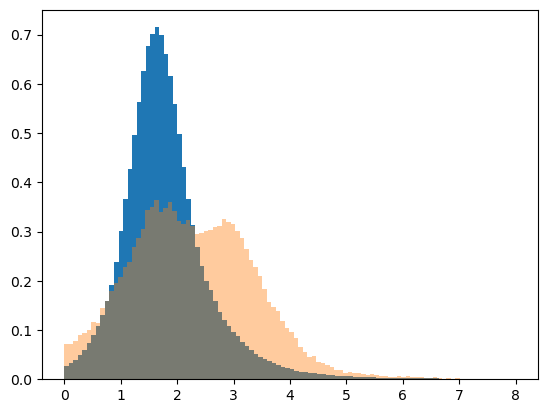

In [13]:
plt.hist(data[TI_SCALE], bins=100, density=True)
plt.hist(data_small_chi_i[TI_SCALE], bins=100, density=True, alpha=0.4)

In [14]:
data_t_ratio = data[(data[T_RATIO] > 0.5) & (data[T_RATIO] < 2)]

<Axes: >

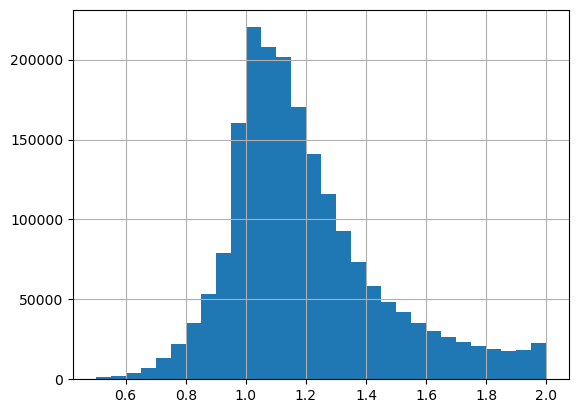

In [17]:
data_t_ratio[T_RATIO].hist(bins=30)